In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_diabetes

In [2]:
DATA_PATH = os.path.join('data')
OUTPUT_CSV = os.path.join(DATA_PATH,'output','diabetes_with_missing.csv')

In [3]:
diabetes = load_diabetes()

df_target = pd.DataFrame(diabetes.target, columns=['progression'])
df_target.head()

,progression
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [4]:
df_data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [5]:
df_diabetes = df_data.join(df_target)
df_diabetes.sample(7)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progression
31,-0.023677,-0.044642,-0.065486,-0.081413,-0.038720,-0.053610,0.059685,-0.076395,-0.037129,-0.042499,59.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357,138.0
149,-0.049105,0.050680,-0.005128,-0.046985,-0.020832,-0.020416,-0.069172,0.071210,0.061238,-0.038357,126.0
190,0.009016,-0.044642,-0.012673,0.028758,-0.018080,-0.005072,-0.047082,0.034309,0.023371,-0.005220,292.0
367,-0.009147,0.050680,0.170555,0.014987,0.030078,0.033759,-0.021311,0.034309,0.033654,0.032059,242.0
123,0.005383,0.050680,0.034751,-0.001091,0.152538,0.198788,-0.061809,0.185234,0.015568,0.073480,84.0
352,0.012648,0.050680,-0.071952,-0.046985,-0.051103,-0.097137,0.118591,-0.076395,-0.020292,-0.038357,77.0


In [6]:
# priceカラムにのみ1%程度の欠損値を追加
df_diabetes2 = df_diabetes.copy()
mask = np.random.rand(len(df_diabetes2)) < 0.01
df_diabetes2.loc[mask, 'progression'] = np.nan

In [7]:
df_diabetes2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          442 non-null    float64
 1   sex          442 non-null    float64
 2   bmi          442 non-null    float64
 3   bp           442 non-null    float64
 4   s1           442 non-null    float64
 5   s2           442 non-null    float64
 6   s3           442 non-null    float64
 7   s4           442 non-null    float64
 8   s5           442 non-null    float64
 9   s6           442 non-null    float64
 10  progression  438 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [8]:
df_diabetes2.isna().sum()

age            0
sex            0
bmi            0
bp             0
s1             0
s2             0
s3             0
s4             0
s5             0
s6             0
progression    4
dtype: int64

In [9]:
# データの保存（オプション）
df_diabetes2.to_csv(OUTPUT_CSV)

In [10]:
df_diabetes2.columns.to_list()

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'progression']

In [11]:
df_diabetes3 = df_diabetes2.dropna(how='any')
df_diabetes3

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [12]:
df_diabetes3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 438 entries, 0 to 441
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          438 non-null    float64
 1   sex          438 non-null    float64
 2   bmi          438 non-null    float64
 3   bp           438 non-null    float64
 4   s1           438 non-null    float64
 5   s2           438 non-null    float64
 6   s3           438 non-null    float64
 7   s4           438 non-null    float64
 8   s5           438 non-null    float64
 9   s6           438 non-null    float64
 10  progression  438 non-null    float64
dtypes: float64(11)
memory usage: 41.1 KB


In [13]:
df_diabetes3.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progression
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000
mean,-0.000074,-0.000028,-0.000317,0.000209,-0.000306,-0.000242,-0.000284,0.000108,-0.000012,-0.000066,152.447489
std,0.047757,0.047618,0.047125,0.047732,0.047662,0.047726,0.047636,0.047733,0.047695,0.047781,77.055929
min,-0.107226,-0.044642,-0.090275,-0.112399,-0.126781,-0.115613,-0.102307,-0.076395,-0.126097,-0.137767,25.000000
25%,-0.038207,-0.044642,-0.035037,-0.036656,-0.034592,-0.030437,-0.036038,-0.039493,-0.033246,-0.034215,87.250000
50%,0.005383,-0.044642,-0.007284,-0.005670,-0.004321,-0.003976,-0.006584,-0.002592,-0.001947,-0.001078,141.000000
75%,0.038076,0.050680,0.031248,0.035644,0.027326,0.029140,0.026550,0.034309,0.032277,0.027917,211.500000
max,0.110727,0.050680,0.160855,0.132044,0.153914,0.198788,0.181179,0.185234,0.133597,0.135612,346.000000


In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

X = df_diabetes3.iloc[:, :-1]
y = df_diabetes3.iloc[:, -1]

categories = X.columns[X.dtypes == 'category'].tolist()
print(categories)

for cat in categories:
    le = LabelEncoder()
    le = le.fit(X[cat])
    X[cat] = le.transform(X[cat])
    X[cat] = X[cat].astype('category')

X

[]


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

rf_model = RandomForestRegressor(max_depth=3)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print(y_pred)
print(r2_score(y_test, y_pred))

[199.87186152 167.45250492 176.09810301 169.25496749 189.1901748
  90.38705769 125.97980722  89.47131416 207.42101827 169.24135467
 184.89883318 131.23825278  92.30650159 198.82859987 228.98596695
 168.47772329  90.38705769 167.62896056 112.52478397 103.67785423
 187.47143244 103.14625    154.48257487 201.11137562 144.89049658
 103.40005284  90.45506484 161.07710019 113.47621551  89.47131416
 163.91511682 148.17676234 168.83031145 234.97942713 179.33764115
 172.29531276 167.34481737 103.63984209 168.66514222 200.89950107
 173.62881524  91.92713678 183.11153491  91.88893667 169.81486963
 102.76456197 129.99244171 178.71538515  91.46528426 159.56948278
 127.7956689  197.49663832 162.13755415  89.89773485 202.85920125
 100.4598274  108.14741996 208.0377425  187.06793125 132.40673043
 131.40559532  94.71811342 100.08941962 171.2745092   99.67868026
 199.70998395 155.8511252  156.24670606 103.07225851 226.06245564
 109.40239173  90.38705769  91.38119265 156.05721329 157.08355215
 164.128376

In [16]:
y_test.head()

368    123.0
78     252.0
280    265.0
395    258.0
440    220.0
Name: progression, dtype: float64

In [17]:
y_pred

array([199.87186152, 167.45250492, 176.09810301, 169.25496749,
       189.1901748 ,  90.38705769, 125.97980722,  89.47131416,
       207.42101827, 169.24135467, 184.89883318, 131.23825278,
        92.30650159, 198.82859987, 228.98596695, 168.47772329,
        90.38705769, 167.62896056, 112.52478397, 103.67785423,
       187.47143244, 103.14625   , 154.48257487, 201.11137562,
       144.89049658, 103.40005284,  90.45506484, 161.07710019,
       113.47621551,  89.47131416, 163.91511682, 148.17676234,
       168.83031145, 234.97942713, 179.33764115, 172.29531276,
       167.34481737, 103.63984209, 168.66514222, 200.89950107,
       173.62881524,  91.92713678, 183.11153491,  91.88893667,
       169.81486963, 102.76456197, 129.99244171, 178.71538515,
        91.46528426, 159.56948278, 127.7956689 , 197.49663832,
       162.13755415,  89.89773485, 202.85920125, 100.4598274 ,
       108.14741996, 208.0377425 , 187.06793125, 132.40673043,
       131.40559532,  94.71811342, 100.08941962, 171.27

In [18]:
df_pred = pd.DataFrame(y_test)
df_pred['y_pred'] = y_pred
df_pred.head()

,progression,y_pred
368,123.0,199.871862
78,252.0,167.452505
280,265.0,176.098103
395,258.0,169.254967
440,220.0,189.190175


Text(0, 0.5, 'pred')

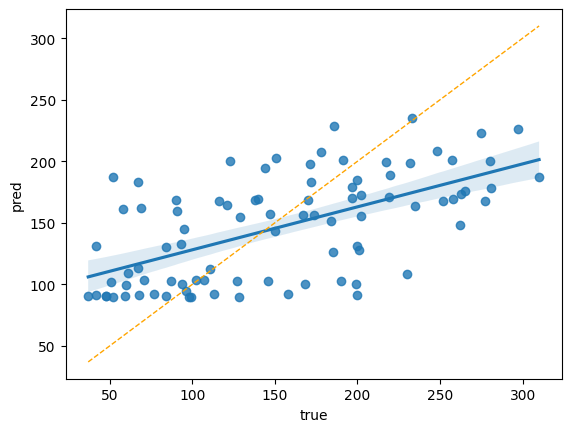

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = plt.gca()

# 傾き1の直線を追加
a_line=[df_pred.progression.min(), df_pred.progression.max()]
sns.regplot(x=df_pred.progression, y=df_pred.y_pred)
sns.regplot(x=a_line, y=a_line,ci=None, scatter=False, line_kws={'color': 'orange', 'linestyle': '--', 'lw': 1})

ax.set_xlabel('true')
ax.set_ylabel('pred')

- カテゴリカル変数を含んでいない点はbad
- ある程度の精度を持つモデルが出来ている点は良いと思う（決定係数で0.41）。許容範囲と言ったところか